In [1]:
from dataset import IAM
from dataloader import CTCDataLoader
from model import CRNNModel

from torch.utils.data import DataLoader
from sklearn import preprocessing
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import Compose, ToTensor, Resize

In [2]:
dataset = IAM('/mnt/d/Machine-Learning/Datasets/iamdataset/uncompressed', csv_file_path='iam_df.csv')

In [3]:
print("Size of Dataset:", len(dataset))
print("Character set:", dataset.charset)
print("Vocab size:", len(dataset.charset))
dataset.data.head(10)

Size of Dataset: 13353
Character set:  !"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
Vocab size: 79


,Image,Segmentation,Transcription,Threshold
0,a01-000u-00.png,ok,A MOVE to stop Mr. Gaitskell from,154
1,a01-000u-01.png,ok,nominating any more Labour life Peers,156
2,a01-000u-02.png,ok,is to be made at a meeting of Labour,157
3,a01-000u-03.png,err,M Ps tomorrow. Mr. Michael Foot has,156
4,a01-000u-04.png,ok,put down a resolution on the subject,157
5,a01-000u-05.png,err,and he is to be backed by Mr. Will,156
6,a01-000u-06.png,ok,"Griffiths, M P for Manchester Exchange.",159
7,a01-000x-00.png,ok,A MOVE to stop Mr. Gaitskell from nominating,182
8,a01-000x-01.png,ok,any more Labour life Peers is to be made at a,181
9,a01-000x-02.png,ok,meeting of Labour 0M Ps tomorrow. Mr. Michael,181


In [10]:
data_loader = CTCDataLoader(dataset)
train_loader, val_loader, test_loader = data_loader(split=(0.6, 0.2, 0.2), batch_size=(8, 16, 16))

In [11]:
len(train_loader)*8 + len(test_loader)*16 + len(val_loader)*16

13360

In [12]:
model = CRNNModel(vocab_size=len(dataset.charset), time_steps=100)

In [11]:
for batch in train_loader:
    images, targets, target_lengths = batch
    preds = model(images)
    
    # N = batch_size, T = input_length (lenght of squences, ie, time_stamps), C = num_classes
    N, T, C = preds.shape
    
    # Apply log softmax to classes
    log_probs = torch.nn.functional.log_softmax(preds, dim=2)
    
    # Permute to bring sequences at first the axis (T x N x C)
    log_probs = log_probs.permute(1, 0, 2).detach().requires_grad_()
    
    # All input sequences in the batch are of same length
    input_lengths = torch.full(size=(N, ), fill_value=T, dtype=torch.long)
    
    print("Input:", log_probs.shape)
    print("Input lengths:", input_lengths)
    print("Output:", targets.shape)
    print("Output lengths:", target_lengths, "Sum of output lengths:", torch.sum(target_lengths))
    
    
    ctc_loss = torch.nn.CTCLoss(reduction='sum', zero_infinity=True)
    loss = ctc_loss(log_probs, targets, input_lengths, target_lengths)
    print('Loss: ', loss)
    break

Input: torch.Size([100, 8, 80])
Input lengths: tensor([100, 100, 100, 100, 100, 100, 100, 100])
Output: torch.Size([344])
Output lengths: tensor([32, 40, 43, 60, 51, 10, 43, 65]) Sum of output lengths: tensor(344)
Loss:  tensor(2826.8650, grad_fn=<SumBackward0>)


Calculate Loss: <br>
    1. Permute the tensor to bring the time_steps at first axis, i.e, from batch_size X time_steps X features to time_steps X batch X features <br>
        1.i.`out = out.permute(1, 0, 2)`<br>
    2. Perform log_softmax on feature axis on of the output tensor (ex: -1)<br>
        2.i. `out = F.log_softmax(out, dim=2) `<br>
    3. Specify length of inputs<br>
        3.i. `input_lengths = torch.full(size=(out.shape[1]), fill_value=out.shape[0], dtype=torch.int32)`<br>
    4. Specify the length of outputs (target) <br>
    5. Calculate loss
        5.i. `loss = nn.CTCLoss(blank=0, out, input_lengths, target_lengts)`


In [9]:
loss_fn = torch.nn.CTCLoss(reduction='sum', zero_infinity=True)



In [13]:
torch.tensor([12, 12], dtype=torch.float32).requires_grad_()

tensor([12., 12.], requires_grad=True)

In [12]:
from tqdm import trange

In [ ]:
trange()

In [14]:
with torch.no_grad():
    images, targets, target_lengths = batch
    batch_preds = model(images)

AttributeError: module 'cv2.cv2' has no attribute 'GRAYSCALE'

In [3]:
img, target = dataset[0]

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

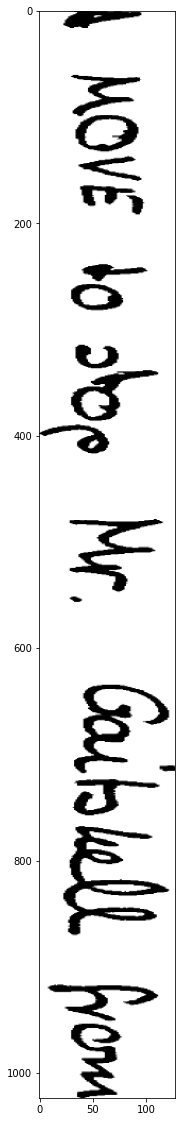

In [7]:
plt.figure(figsize=(10, 20))
plt.imshow(img[0], cmap='gray')
img[0]

In [4]:
lstm = torch.nn.LSTM(input_size=1024, hidden_size=512, num_layers=2, 
                            bidirectional=True, batch_first=True)
linear1 = torch.nn.Linear(1024, 256)
linear2 = torch.nn.Linear(256, 80)

out, _ = lstm(torch.rand(4, 32, 1024))
out = linear1(out)
out = linear2(out)
out.shape

torch.Size([4, 32, 80])